# Demonstration Canopy Cover Calculation

This assumes that the canopy cover image has been preprocessed
so that is it black and white.
Our assumption is that the canopy is darker than the sky.
The canopy will be set to black (i.e. zero)
and the sky will be set to white (i.e. one).

For convenience well use a randomly generated image
instead of an actual image of the canopy cover.
The `RandomState` object is a Pseudo Random Number Generator,
so the "random" numbers are repeatable.
This will probably be used as a fixture in a unit test.

Note: The `numpy` version of `randint` is exclusive, so you specify 0, 2.
If you were using the built in Python `random` then you would use 0, 1
because it is inclusive.

[[0 0 0 0 1 0 0 1 1]
 [1 1 0 1 0 0 0 1 0]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 0]
 [0 0 1 1 0 1 0 1 1]]


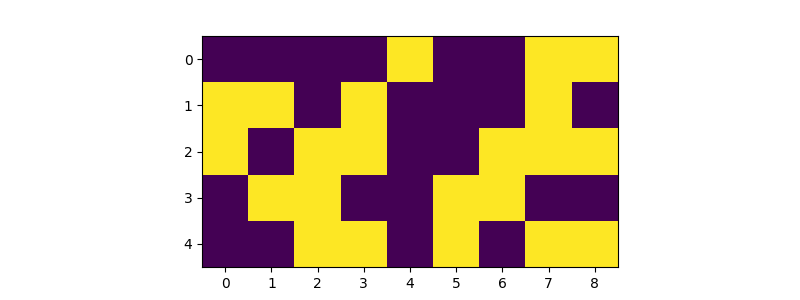

In [68]:
"""Create a dummy canopy image in ."""
%matplotlib widget

import numpy
from matplotlib import pyplot
from numpy import random
from skimage import draw

PRNG = random.RandomState(seed=2024)  # The Pseudo Random Number Generator.
ROWS = 5
COLUMNS = 9
CANOPY_IMAGE = PRNG.randint(0, 2, size=(ROWS, COLUMNS))  # rows then columns = array.
print(CANOPY_IMAGE)

figure, axes = pyplot.subplots(figsize=(8,3))
axes.imshow(CANOPY_IMAGE)

## Circular Mask

We want the biggest circle we can have from the middle of the image.
So we need a circular mask to turn off anything outside the mask,
and keep the visible area within the circle.
By masking the image so that it is circle,
it ensures that two image taken at different compass orientations
"should" come with the same
(or at least similar)
answers.
Put another way,
two pictures taken from the same position will have the same result,
even if the second picture is taken at 90 degrees to the first.

The `disk` that `skimage.draw` returns is actually a tuple
of two arrays
giving the row and column indices of the pixels which are to be set to `True`.

(np.float64(-0.5), np.float64(8.5), np.float64(4.5), np.float64(-0.5))

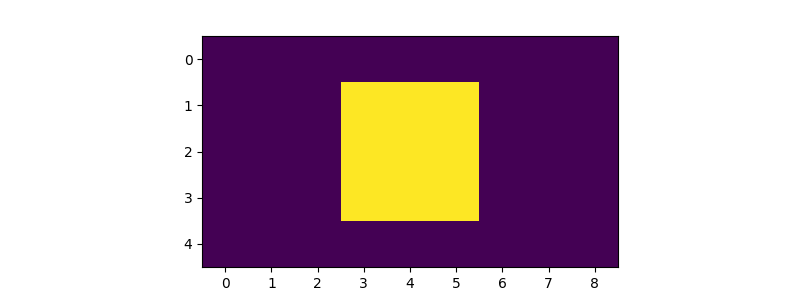

In [69]:
"""Create a circular mask."""
CANOPY_IMAGE_SHAPE = CANOPY_IMAGE.shape
ROWS = CANOPY_IMAGE_SHAPE[0]
COLUMNS = CANOPY_IMAGE_SHAPE[1]

SHORTEST_SIDE = min(ROWS, COLUMNS)
RADIUS = SHORTEST_SIDE // 2
CENTER_Y = ROWS // 2
CENTER_X = COLUMNS // 2

# Create a mask with a circle
CANOPY_IMAGE_MASK = numpy.zeros(CANOPY_IMAGE_SHAPE, dtype=bool)
DISK = draw.disk(
    (CENTER_Y, CENTER_X), RADIUS, shape=(ROWS, COLUMNS)
)
# The DISK is actually a tuple of the row and column indices of the pixels of the disk.
CANOPY_IMAGE_MASK[DISK] = True

figure, axes = pyplot.subplots(figsize=(8, 3))
axes.imshow(CANOPY_IMAGE_MASK)
axes.axis("on")

In this situation the circle looks like a square because the resolution is so low.
If you increase the resolution it starts looking like a circle,
but the resolution is kept low so you can count the pixels
and confirm everything manually.

## Visible Area

This is to be a calculation of the canopy cover in the area of interest
(= the visible area of the mask).
So we need the total number of pixels in the visible area.

In [70]:
"""Get the number of pixels in the mask."""
VISIBLE_AREA_PIXELS = numpy.sum(CANOPY_IMAGE_MASK)
print(f"Mask visible area pixels: {VISIBLE_AREA_PIXELS:,}")

Mask visible area pixels: 9


## Masking the Canopy Image

Applying the mask to the image should leave the sky pixels
(those set to one)
visible in the middle of the image.

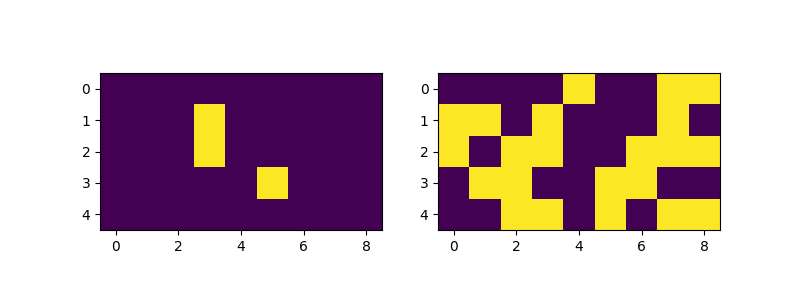

In [71]:
"""Use the mask to blank any pixels we are not interested in."""
MASKED_CANOPY_IMAGE = CANOPY_IMAGE * CANOPY_IMAGE_MASK

figure, axes = pyplot.subplots(1, 2, figsize=(8,3))
axes[0].imshow(MASKED_CANOPY_IMAGE)
axes[1].imshow(CANOPY_IMAGE)

## Calculate the Canopy Cover

We can see that only the blocks in the middle are included.
The yellow ones are the sky pixels that are set to one,
the canopy pixels are the other ones.
So the canopy pixels are the visible area pixels less the sky pixels.

In [72]:
"""Calculate the canopy cover."""
VISIBLE_CANOPY_PIXELS = VISIBLE_AREA_PIXELS - numpy.sum(MASKED_CANOPY_IMAGE)
PERCENTAGE_CANOPY = VISIBLE_CANOPY_PIXELS / VISIBLE_AREA_PIXELS
print(
    f"Percentage canopy {VISIBLE_CANOPY_PIXELS}/{VISIBLE_AREA_PIXELS} = "
    f"{PERCENTAGE_CANOPY:.2f}"
)

Percentage canopy 6/9 = 0.67


## Sample Size

It is interesting to note that the canopy cover is about two thirds,
despite that fact that the initial image is 50% canopy.
If the rows and columns in the randomly generated image are increased
(e.g. `ROWS = 50` and `COLUMNS = 90`)
the size of the visible area increases
so the percentage canopy cover approaches the expected value.